In [2]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [4]:
df['Date'] = ['Dec1','Jan 1', 'mid-may']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,Dec1
Store 1,Kevyn,Kitty Litter,2.5,Jan 1
Store 2,Filip,Spoon,5.0,mid-may


In [6]:
df['Delievery'] = 'True'
df

,Name,Item Purchased,Cost,Date,Delievery
Store 1,Chris,Sponge,22.5,Dec1,True
Store 1,Kevyn,Kitty Litter,2.5,Jan 1,True
Store 2,Filip,Spoon,5.0,mid-may,True


In [8]:
df2 = df.reset_index()
df2['Date'] = pd.Series({0:'Dec' , 2:'mid-may'})
df2

,index,Name,Item Purchased,Cost,Date,Delievery
0,Store 1,Chris,Sponge,22.5,Dec,True
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True
2,Store 2,Filip,Spoon,5.0,mid-may,True


In [24]:
df1 = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                    {'Name': 'Sally', 'Role': 'Course liasion'},
                    {'Name': 'James', 'Role': 'Grader'}])
df1 = df1.set_index('Name')

df2 = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                    {'Name': 'Mike', 'School': 'Law'},
                    {'Name': 'Sally', 'School': 'Engineering'}])
df2 = df2.set_index('Name')

print(df1.head())
print()
print(df2.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [15]:
pd.merge(df1, df2, how = 'outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [16]:
pd.merge(df1, df2, how = 'inner', left_index = True, right_index = True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [19]:
pd.merge(df1, df2, how = 'left', left_index = True, right_index = True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [20]:
pd.merge(df1, df2, how = 'right', left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [25]:
df1 = df1.reset_index()
df2 = df2.reset_index()
print(df1)
print(' ')
print(df2)

    Name            Role
0  Kelly  Director of HR
1  Sally  Course liasion
2  James          Grader
 
    Name       School
0  James     Business
1   Mike          Law
2  Sally  Engineering


In [27]:
pd.merge(df1, df2, how = 'outer', left_on = 'Name', right_on = 'Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business
3,Mike,NaN,Law


In [28]:
df1 = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
df2 = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

print(df1)
print()
print(df2)

    Name            Role           Location
0  Kelly  Director of HR       State Street
1  Sally  Course liasion  Washington Avenue
2  James          Grader  Washington Avenue

    Name       School              Location
0  James     Business  1024 Billiard Avenue
1   Mike          Law  Fraternity House #22
2  Sally  Engineering   512 Wilson Crescent


In [29]:
pd.merge(df1, df2, how = 'left', left_on = 'Name', right_on = 'Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [34]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
#staff_df
#student_df
pd.merge(staff_df, student_df, how='outer', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,Engineering
2,James,Wilde,Grader,NaN
3,James,Hammond,NaN,Business
4,Mike,Smith,NaN,Law


In [72]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [73]:
%%timeit -n 1
(df.where(df['SUMLEV']==50)
   .dropna()
   .set_index(['STNAME','CTYNAME'])
   .rename(columns={'ESTIMATESBASE2010':'Estimate Base 2010'}))

117 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [88]:
import numpy as np

def minmax(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [91]:
df.apply(minmax, axis = 1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [94]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis =1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

In [99]:

import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [101]:
%%timeit -n 3
for i in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME'] == i).dropna()['CENSUS2010POP'])
    print(i,' ',avg)

Alabama   71339.3432836
Alaska   24490.7241379
Arizona   426134.466667
Arkansas   38878.9066667
California   642309.586207
Colorado   78581.1875
Connecticut   446762.125
Delaware   299311.333333
District of Columbia   601723.0
Florida   280616.567164
Georgia   60928.6352201
Hawaii   272060.2
Idaho   35626.8636364
Illinois   125790.509804
Indiana   70476.1086957
Iowa   30771.2626263
Kansas   27172.552381
Kentucky   36161.3916667
Louisiana   70833.9375
Maine   83022.5625
Maryland   240564.666667
Massachusetts   467687.785714
Michigan   119080.0
Minnesota   60964.6551724
Mississippi   36186.5487805
Missouri   52077.626087
Montana   17668.125
Nebraska   19638.0752688
Nevada   158855.941176
New Hampshire   131647.0
New Jersey   418661.619048
New Mexico   62399.3636364
New York   312550.032258
North Carolina   95354.83
North Dakota   12690.3962264
Ohio   131096.636364
Oklahoma   48718.8441558
Oregon   106418.722222
Pennsylvania   189587.746269
Rhode Island   210513.4
South Carolina   100551.

In [102]:
%%timeit -n 3
for i,j in df.groupby('STNAME'):
    avg = np.average(j['CENSUS2010POP'])
    print(i , avg)

Alabama 71339.3432836
Alaska 24490.7241379
Arizona 426134.466667
Arkansas 38878.9066667
California 642309.586207
Colorado 78581.1875
Connecticut 446762.125
Delaware 299311.333333
District of Columbia 601723.0
Florida 280616.567164
Georgia 60928.6352201
Hawaii 272060.2
Idaho 35626.8636364
Illinois 125790.509804
Indiana 70476.1086957
Iowa 30771.2626263
Kansas 27172.552381
Kentucky 36161.3916667
Louisiana 70833.9375
Maine 83022.5625
Maryland 240564.666667
Massachusetts 467687.785714
Michigan 119080.0
Minnesota 60964.6551724
Mississippi 36186.5487805
Missouri 52077.626087
Montana 17668.125
Nebraska 19638.0752688
Nevada 158855.941176
New Hampshire 131647.0
New Jersey 418661.619048
New Mexico 62399.3636364
New York 312550.032258
North Carolina 95354.83
North Dakota 12690.3962264
Ohio 131096.636364
Oklahoma 48718.8441558
Oregon 106418.722222
Pennsylvania 189587.746269
Rhode Island 210513.4
South Carolina 100551.391304
South Dakota 12336.0606061
Tennessee 66801.1052632
Texas 98998.2716535
Utah

In [103]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [15]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [16]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [18]:
(df.set_index('STNAME').groupby(level = 0)['POPESTIMATE2011']
  .agg( np.average))

F:\Anaconda\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
F:\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


STNAME
Alabama                  71658.328358
Alaska                   24921.379310
Arizona                 431248.800000
Arkansas                 39180.506667
California              650000.586207
Colorado                 79991.875000
Connecticut             448719.875000
Delaware                302638.666667
District of Columbia    620472.000000
Florida                 285157.208955
Georgia                  61712.452830
Hawaii                  275645.400000
Idaho                    36003.045455
Illinois                126096.882353
Indiana                  70835.271739
Iowa                     30963.525253
Kansas                   27332.542857
Kentucky                 36399.016667
Louisiana                71490.328125
Maine                    83016.062500
Maryland                243507.125000
Massachusetts           472271.214286
Michigan                118995.048193
Minnesota                61472.632184
Mississippi              36317.060976
Missouri                 52265.973913
Monta

# FIX FOR PERFORMING MULTIPLE NUMPY OPERATION ON GROUP

In [20]:
df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg([np.average, np.sum])

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


POPESTIMATE2010           POPESTIMATE2011          
                             average       sum         average       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [22]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df['Grades'].astype('category')

# Fix for error in categories defining

In [26]:
from pandas.api.types import CategoricalDtype
grade = df['Grades'].astype(CategoricalDtype(categories = ['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                           ordered = True))
grade

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df = df.set_index('STNAME').groupby(level = 0)['CENSUS2010POP'].agg(np.average)
pd.cut(df,10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [29]:
df = pd.read_csv('cars.csv')
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [40]:
df.pivot_table(values = '(kW)', index = 'YEAR', columns = 'Make' , aggfunc=np.min)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,270.0
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,225.0
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,280.0
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,283.0


In [41]:
pd.Timestamp('6/5/1995')

Timestamp('1995-06-05 00:00:00')

In [42]:
pd.Period('6/5/1995')

Period('1995-06-05', 'D')

In [47]:
s1 = pd.Series(list('abc'),[pd.Timestamp('5/6/11'), pd.Timestamp('5/7/11'), pd.Timestamp('5/8/11')])
s1

2011-05-06    a
2011-05-07    b
2011-05-08    c
dtype: object

In [55]:
pd.to_datetime('6/5/11')

Timestamp('2011-06-05 00:00:00')

In [67]:
dates = pd.date_range('10-05-1995', periods = 5, freq = '1Y')
df = pd.Series(np.random.randint(1,20,5), index = dates)

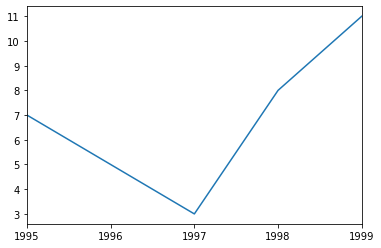

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()